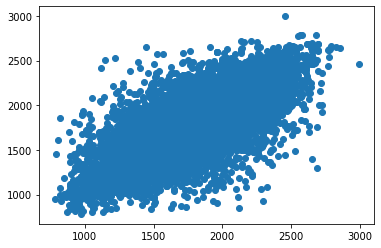

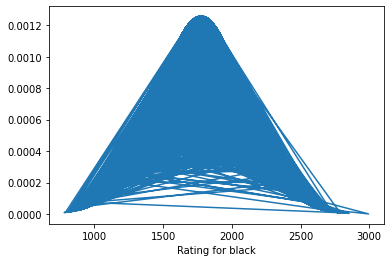

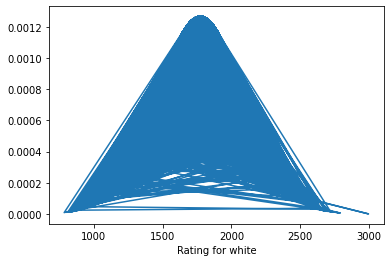

Variance :  100758 99124
Standard Deviation :  317.4240066535611 314.83964172257595
Skewness :  -0.0009811023428434368 -0.016029833600817736
Mean :  1774.5285185383914 1774
Mode :  1500 1500
Median :  1781.0 1782.0


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from scipy import stats
import statistics as st
from statsmodels.stats.weightstats import ztest as ztest


dt = pd.read_csv('Chess games stats.csv')

rating_white = np.array(dt['White Rating'])
rating_black = np.array(dt['Black Rating'])

# Data
d1 = rating_black
d2 = rating_white

# Scatter black and white rating
plt.scatter(d1,d2)
plt.show()
   
# Calculating mean, variance and standard deviation
mean1 = st.mean(d1)
mean2 = st.mean(d2)

var1 = st.variance(d1)
var2 = st.variance(d2)

sd1 = st.stdev(d1)
sd2 = st.stdev(d2)

plt.plot(d1, norm.pdf(d1, mean1, sd1))
plt.xlabel('Rating for black')
plt.show()
plt.plot(d2, norm.pdf(d2, mean2, sd2))
plt.xlabel('Rating for white')
plt.show()

# Variance 
print('Variance : ',var1,var2)
# Standard Deviation
print('Standard Deviation : ',sd1,sd2)

# Skewness
skewness1 = skew(d1)
skewness2 = skew(d2)
print('Skewness : ',skewness1, skewness2)

# Mean
mean1 = np.mean(d1)
mean1 = np.mean(d2)
print('Mean : ',mean1,mean2)
# Mode
mode1= st.mode(d1)
mode2 = st.mode(d2)
print('Mode : ',mode1,mode2)
# Median
median1 = np.median(d1)
median2 = np.median(d2)
print('Median : ',median1,median2)

# Degrees of freedom
dof = len(d1) + len(d2) - 2

Normal Distribution

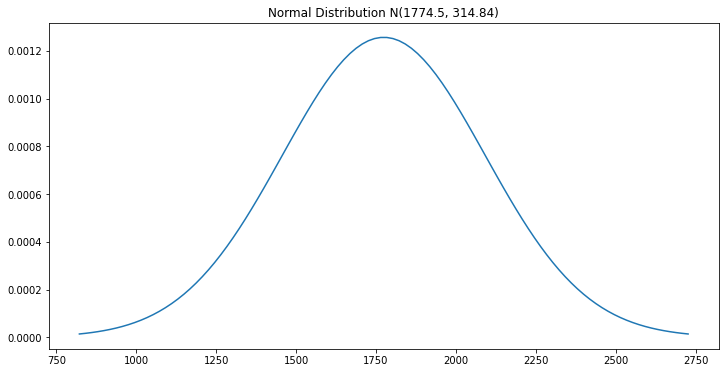

In [2]:
plt.figure(figsize=(12,6))
ax = plt.gca()
x = np.linspace(mean1-3*sd1, mean1 + 3*sd1, 100)
plt.plot(x, norm.pdf(x,mean1,sd1))
plt.title('Normal Distribution N(1774.5, 314.84)')
plt.show()

Probability r>2300

Probability to have more than 2300 rating is 95.11%


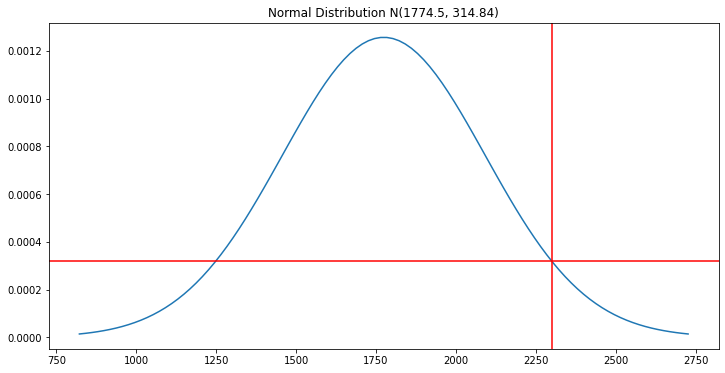

In [3]:
norm(mean1, sd1)
x1 = 2300
y1 = norm(mean1, sd1).cdf(x1)
z1 = norm(mean1, sd1).pdf(x1)

plt.figure(figsize=(12,6))
ax = plt.gca()
x = np.linspace(mean1-3*sd1, mean1 + 3*sd1, 100)
plt.plot(x, norm.pdf(x, mean1, sd1))
plt.axvline(x1, color='red')
plt.axhline(z1, color='red')
plt.title("Normal Distribution N(1774.5, 314.84)")
print("Probability to have more than {} rating is {}%".format(x1, round(100*y1,2)))



Probabilty = 95%

We have 95% of probability that r <= 2296.645


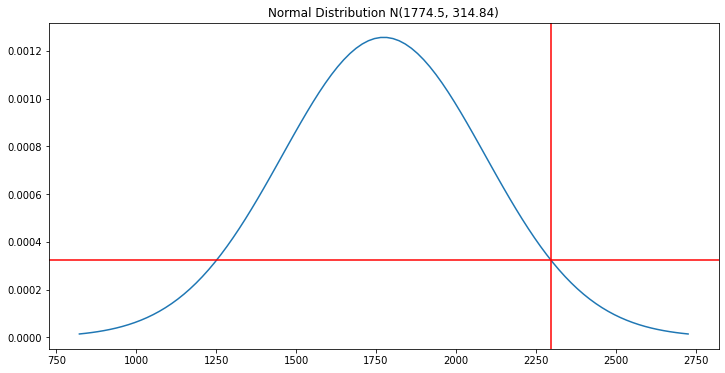

In [4]:
norm(mean1, sd1)
y1 = 0.95
x1 = norm(mean1, sd1).ppf(y1)
z1 = norm(mean1, sd1).pdf(x1)

plt.figure(figsize=(12,6))
ax = plt.gca()
x = np.linspace(mean1-3*sd1, mean1 + 3*sd1, 100)
plt.plot(x, norm.pdf(x, mean1, sd1))
plt.axvline(x1, color='red')
plt.axhline(z1, color='red')
plt.title("Normal Distribution N(1774.5, 314.84)")
print("We have 95% of probability that r <= {}".format(round(x1,3)))



T-Test

In [5]:
# One sample T-Test
dt['White Rating'].describe()
ttest, pval = stats.ttest_1samp(dt['White Rating'], 180)
print("P-values: ",pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

P-values:  0.0
reject null hypothesis


In [6]:
# Two sampled T-Test
dt[['White Rating','Black Rating']].describe()
ttest,pval = stats.ttest_ind(dt['White Rating'],dt['Black Rating'])
print("P-values: ",pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

P-values:  0.501506521406875
accept null hypothesis


In [7]:
# Paired sampled T-Test
dt[['White Rating','Black Rating']].describe()
ttest,pval = stats.ttest_rel(dt['White Rating'],dt['Black Rating'])
print("P-values: ",pval)


if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

P-values:  0.13623824274174992
accept null hypothesis


Z-Test

In [8]:
# One sample Z-Test
print('Test statistic:      ','P-value: ')
ztest(d1, value=2300)

Test statistic:       P-value: 


(-225.04720589661122, 0.0)

In [9]:
# Two sampled Z-Test 
print('Test statistic:      ','P-value: ')
ztest(d1,d2,value=0)

Test statistic:       P-value: 


(0.6721277759354549, 0.5015023551781221)